In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from collections import Counter

In [ ]:
df = pd.read_excel('MAPTFIVE.xls')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sta_Phe     1069 non-null   object 
 1   Sex         1223 non-null   int64  
 2   Age         1223 non-null   int64  
 3   nivEtude5c  1207 non-null   object 
 4   gpeMapt4c   1223 non-null   object 
 5   scCaide     1195 non-null   float64
 6   BMI         929 non-null    float64
 7   VAS_Mem     946 non-null    float64
 8   VAS_Imp     946 non-null    float64
 9   tot_GDS     940 non-null    float64
 10  som_CDR     945 non-null    float64
 11  tot_SPPB    927 non-null    float64
 12  nbCI        1220 non-null   float64
 13  typeCI      1220 non-null   object 
 14  Group       1223 non-null   int64  
 15  MMSE        944 non-null    float64
dtypes: float64(9), int64(3), object(4)
memory usage: 153.0+ KB


In [ ]:
df.shape

(1223, 16)

In [ ]:
df['gpeMapt4c'] = df['gpeMapt4c'].replace(['1:omega3+IM', '2:omega3', '3:IM', '4:ctrl'], [1,2,3,4])
df['nivEtude5c'] = df['nivEtude5c'].replace(['1:aucune ou <CEP', '2:CEP', '3:brevet-CAP-BEP', '4:bac','5:>bac'], [1,2,3,4,5])
df['Sta_Phe']=df['Sta_Phe'].replace(['E2/E2','E2/E3','E2/E4','E3/E3','E3/E4', 'E4/E4'], [0,1,2,3,4,5])
df['typeCI']=df['typeCI'].replace(['1-plainte mnÈsique seule','2-pb IADL seul','3-lenteur marche seule','4-plainte mnÈsique+pb IADL','5-plainte mnÈsique+lenteur marche', '6-pb IADL+lenteur marche', '7-plainte mnÈsique+pb IADL+lenteur marche'], [1,2,3,4,5,6,7])
print(df.head(10))

   Sta_Phe  Sex  Age  nivEtude5c  gpeMapt4c  scCaide    BMI  VAS_Mem  VAS_Imp  \
0      3.0    0   75         3.0          1     11.0    NaN      NaN      NaN   
1      3.0    0   85         2.0          2      8.0    NaN      NaN      NaN   
2      3.0    0   71         5.0          1      4.0  19.47     45.0     26.0   
3      1.0    1   71         3.0          1      9.0    NaN      NaN      NaN   
4      3.0    1   75         1.0          3     10.0    NaN      NaN      NaN   
5      1.0    1   77         2.0          3      9.0  27.89     80.0     85.0   
6      3.0    0   76         3.0          1      9.0  26.03     54.0     19.0   
7      3.0    0   73         4.0          1      6.0  30.43     52.0      7.0   
8      3.0    0   83         5.0          3      6.0  24.20     65.0    100.0   
9      3.0    0   71         5.0          1      6.0  22.94     22.0      6.0   

   tot_GDS  som_CDR  tot_SPPB  nbCI  typeCI  Group  MMSE  
0      NaN      NaN       NaN   2.0     5.0      

In [ ]:
df.isnull().sum()

Sta_Phe       154
Sex             0
Age             0
nivEtude5c     16
gpeMapt4c       0
scCaide        28
BMI           294
VAS_Mem       277
VAS_Imp       277
tot_GDS       283
som_CDR       278
tot_SPPB      296
nbCI            3
typeCI          3
Group           0
MMSE          279
dtype: int64

In [ ]:
df.Sta_Phe.fillna ( df.Sta_Phe.mean() , inplace=True ) # impute mode
df.nivEtude5c.fillna ( df.nivEtude5c.mean() , inplace=True )
df.scCaide.fillna ( df.scCaide.mean() , inplace=True )
df.BMI.fillna ( df.BMI.mean() , inplace=True )
df.VAS_Mem.fillna ( df.VAS_Mem.mean() , inplace=True )
df.VAS_Imp.fillna ( df.VAS_Imp.mean() , inplace=True )
df.tot_GDS.fillna ( df.tot_GDS.mean() , inplace=True )
df.som_CDR.fillna ( df.som_CDR.mean() , inplace=True )
df.tot_SPPB.fillna ( df.tot_SPPB.mean() , inplace=True )
df.nbCI.fillna ( df.nbCI.mean() , inplace=True )
df.typeCI.fillna ( df.typeCI.mean() , inplace=True )
df.MMSE.fillna ( df.MMSE.mean() , inplace=True )
df.isna().sum()

Sta_Phe       0
Sex           0
Age           0
nivEtude5c    0
gpeMapt4c     0
scCaide       0
BMI           0
VAS_Mem       0
VAS_Imp       0
tot_GDS       0
som_CDR       0
tot_SPPB      0
nbCI          0
typeCI        0
Group         0
MMSE          0
dtype: int64

In [ ]:
# In this we would like to drop the columns which are not realated to present work as our aim is to predict MMSE range
df1 = df.drop(['Group', 'typeCI'], axis = 1)
df1.head()

,Sta_Phe,Sex,Age,nivEtude5c,gpeMapt4c,scCaide,BMI,VAS_Mem,VAS_Imp,tot_GDS,som_CDR,tot_SPPB,nbCI,MMSE
0,3.0,0,75,3.0,1,11.0,26.249311,49.436575,36.989429,3.125532,0.403175,10.475728,2.0,28.208686
1,3.0,0,85,2.0,2,8.0,26.249311,49.436575,36.989429,3.125532,0.403175,10.475728,1.0,28.208686
2,3.0,0,71,5.0,1,4.0,19.470000,45.000000,26.000000,5.000000,0.500000,12.000000,1.0,29.000000
3,1.0,1,71,3.0,1,9.0,26.249311,49.436575,36.989429,3.125532,0.403175,10.475728,1.0,28.208686
4,3.0,1,75,1.0,3,10.0,26.249311,49.436575,36.989429,3.125532,0.403175,10.475728,1.0,28.208686


<Axes: >

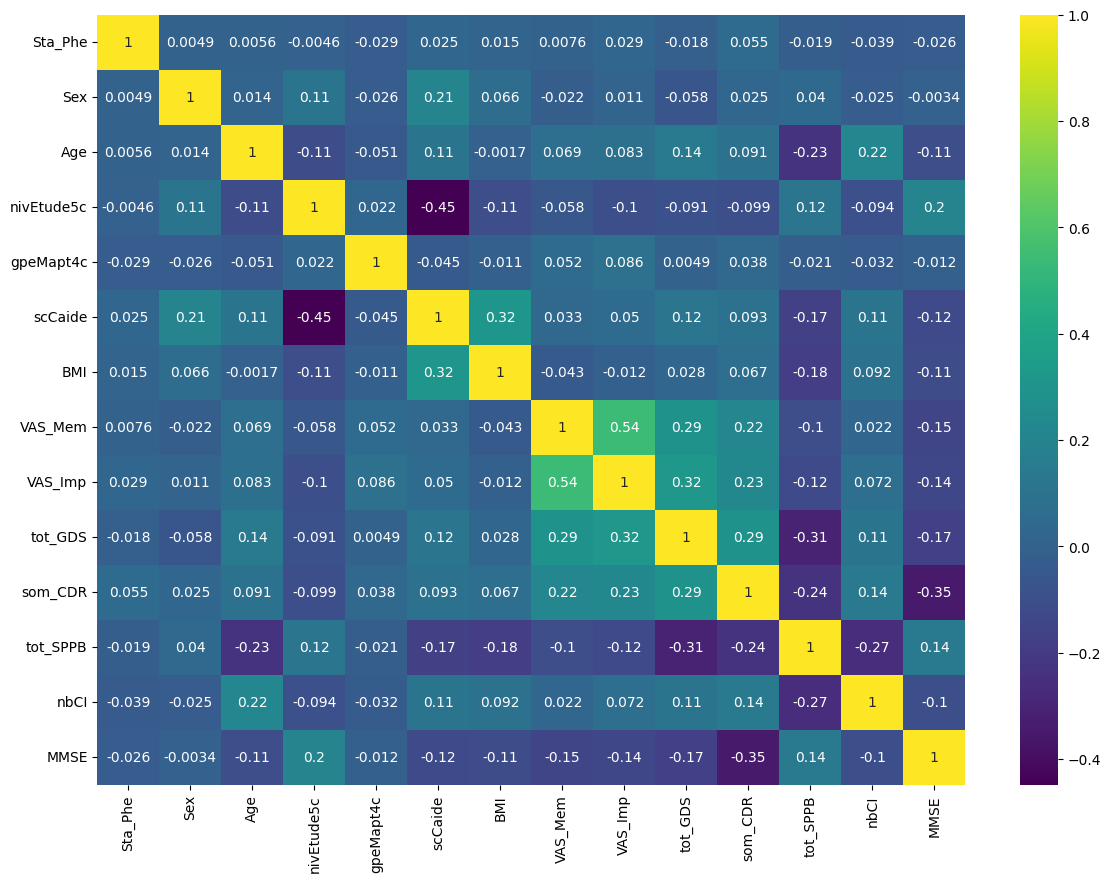

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df[df1.columns].corr(), annot=True, cmap='viridis')

In [ ]:
def cat_MMSE(n):
     if n >= 26:
        return 'NC & SCD'
     elif n == 24 or n == 25:
        return 'PCI'
     elif 23 <= n <= 20:
        return 'VMD'
     else:
        return 'Demented'
df1['MMSE'] = df1['MMSE'].apply(cat_MMSE)

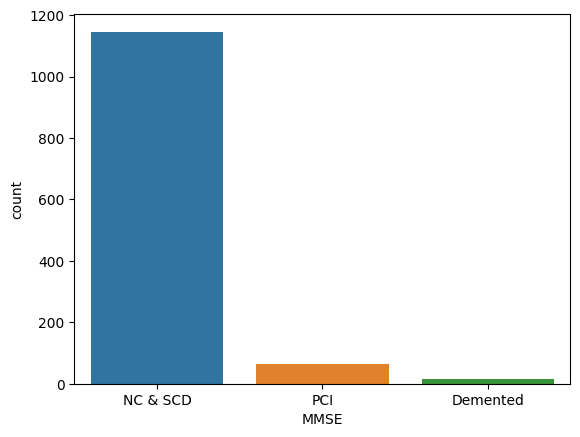

In [ ]:
sns.countplot(x = 'MMSE', data = df1)
plt.show()

In [ ]:
# In the above graph we have found the two categories only in the dataset which is NC & SCD and MCI
df1['MMSE'] = df1['MMSE'].replace(['NC & SCD', 'PCI','Demented'], [0,1,2])

In [ ]:
df1['MMSE'].value_counts()

0    1146
1      63
2      14
Name: MMSE, dtype: int64

In [ ]:
print(sorted(Counter(df1['MMSE']).items()))

[(0, 1146), (1, 63), (2, 14)]


In [ ]:
X=df1
Y=df1['MMSE']

In [ ]:
X.columns

Index(['Sta_Phe', 'Sex', 'Age', 'nivEtude5c', 'gpeMapt4c', 'scCaide', 'BMI',
       'VAS_Mem', 'VAS_Imp', 'tot_GDS', 'som_CDR', 'tot_SPPB', 'nbCI', 'MMSE'],
      dtype='object')

In [ ]:
X.drop('MMSE',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size =0.2)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (978, 13) (978,)
Test set: (245, 13) (245,)


In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
classificaiton_report = classification_report(y_test, predictions)
print('Classificaiton report of SVM is: ', '\n' , classificaiton_report)

Classificaiton report of SVM is:  
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       228
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2

    accuracy                           0.93       245
   macro avg       0.31      0.33      0.32       245
weighted avg       0.87      0.93      0.90       245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)
classificaiton_report = classification_report(y_test, predictions)
print('Classificaiton report of Random Forest is: ', '\n' , classificaiton_report)

Classificaiton report of Random Forest is:  
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       228
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2

    accuracy                           0.93       245
   macro avg       0.31      0.33      0.32       245
weighted avg       0.87      0.93      0.90       245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)
classificaiton_report = classification_report(y_test, predictions)
print('Classificaiton report of NB is: ', '\n' , classificaiton_report)

Classificaiton report of NB is:  
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       228
           1       0.18      0.13      0.15        15
           2       0.20      0.50      0.29         2

    accuracy                           0.90       245
   macro avg       0.44      0.53      0.46       245
weighted avg       0.89      0.90      0.90       245



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
classificaiton_report = classification_report(y_test, y_pred)
print('Classificaiton report of KNN is: ', '\n' , classificaiton_report)

Classificaiton report of KNN is:  
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       228
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2

    accuracy                           0.93       245
   macro avg       0.31      0.33      0.32       245
weighted avg       0.87      0.93      0.90       245



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       228
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2

    accuracy                           0.91       245
   macro avg       0.31      0.33      0.32       245
weighted avg       0.86      0.91      0.89       245



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the AdaBoost Classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier on the training data
ada_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_classifier.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       228
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         2

    accuracy                           0.86       245
   macro avg       0.31      0.31      0.31       245
weighted avg       0.87      0.86      0.87       245



In [ ]:
# Normalize Data Data Standardization give data zero mean and unit variance
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled= preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [ ]:
X_train_scaled[0:5]

array([[-0.01589281, -0.63938367, -0.57776383,  1.59468146,  1.52933828,
        -1.83256413, -1.54188622, -1.438629  , -1.81677049, -1.00332889,
        -0.3762645 ,  0.94591363, -0.54055523],
       [-0.01589281, -0.63938367, -0.3672085 ,  0.7888845 ,  1.52933828,
         0.08949361,  0.08398443,  0.78492293, -0.94332011, -1.30177491,
         0.08709369,  0.52452139, -0.54055523],
       [ 1.32254644, -0.63938367, -0.3672085 ,  1.59468146, -1.25035786,
        -1.83256413, -0.02003511,  0.46727265, -0.36101985, -0.40643684,
        -0.8396227 ,  0.52452139, -0.54055523],
       [-0.01589281, -0.63938367, -0.3672085 , -0.01691245,  0.6027729 ,
         0.08949361, -1.31123419,  0.27668249, -0.89479509,  0.19045521,
        -0.8396227 ,  0.94591363, -0.54055523],
       [-0.01589281,  1.56400617, -0.78831916, -0.01691245,  0.6027729 ,
        -0.39102082, -0.67807177,  1.54728359,  1.43440593, -0.70488286,
         0.55045188,  0.52452139, -0.54055523]])

In [ ]:
X_test_scaled[0:5]

array([[ 1.30280131, -0.66736658,  1.51894028, -0.07364503, -1.25092447,
         0.97297858, -1.29756214,  0.72433224,  0.02171011, -0.14336107,
        -0.81764495,  0.91690936, -0.50544899],
       [-0.0052609 , -0.66736658, -0.81419145, -0.07364503,  0.56860203,
         0.97297858, -0.31369201, -0.1240228 , -0.20676166, -0.40739158,
        -0.44244416,  0.32247623, -0.50544899],
       [-0.0052609 , -0.66736658, -0.60208857, -0.86742531, -0.34116122,
        -0.92143386,  0.87681862, -0.21387663,  0.29529783, -0.74722646,
        -0.35233688, -0.64300433, -0.50544899],
       [-0.04931164, -0.66736658,  1.94314605, -0.07364503, -1.25092447,
         0.02577236,  0.34852799, -0.33897114,  0.24969988,  1.6682351 ,
        -0.35233688, -1.03298275,  2.68217526],
       [-0.0052609 , -0.66736658, -1.02629433, -0.86742531,  0.56860203,
         0.97297858,  1.23052393,  0.84942676,  0.52328759,  2.57403318,
         3.37012765, -1.81293959, -0.50544899]])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X,Y)
oversampled_df1 = print(sorted(Counter(Y_resampled).items()),Y_resampled.shape)

[(0, 1146), (1, 1146), (2, 1146)] (3438,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size =0.2)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (2750, 13) (2750,)
Test set: (688, 13) (688,)


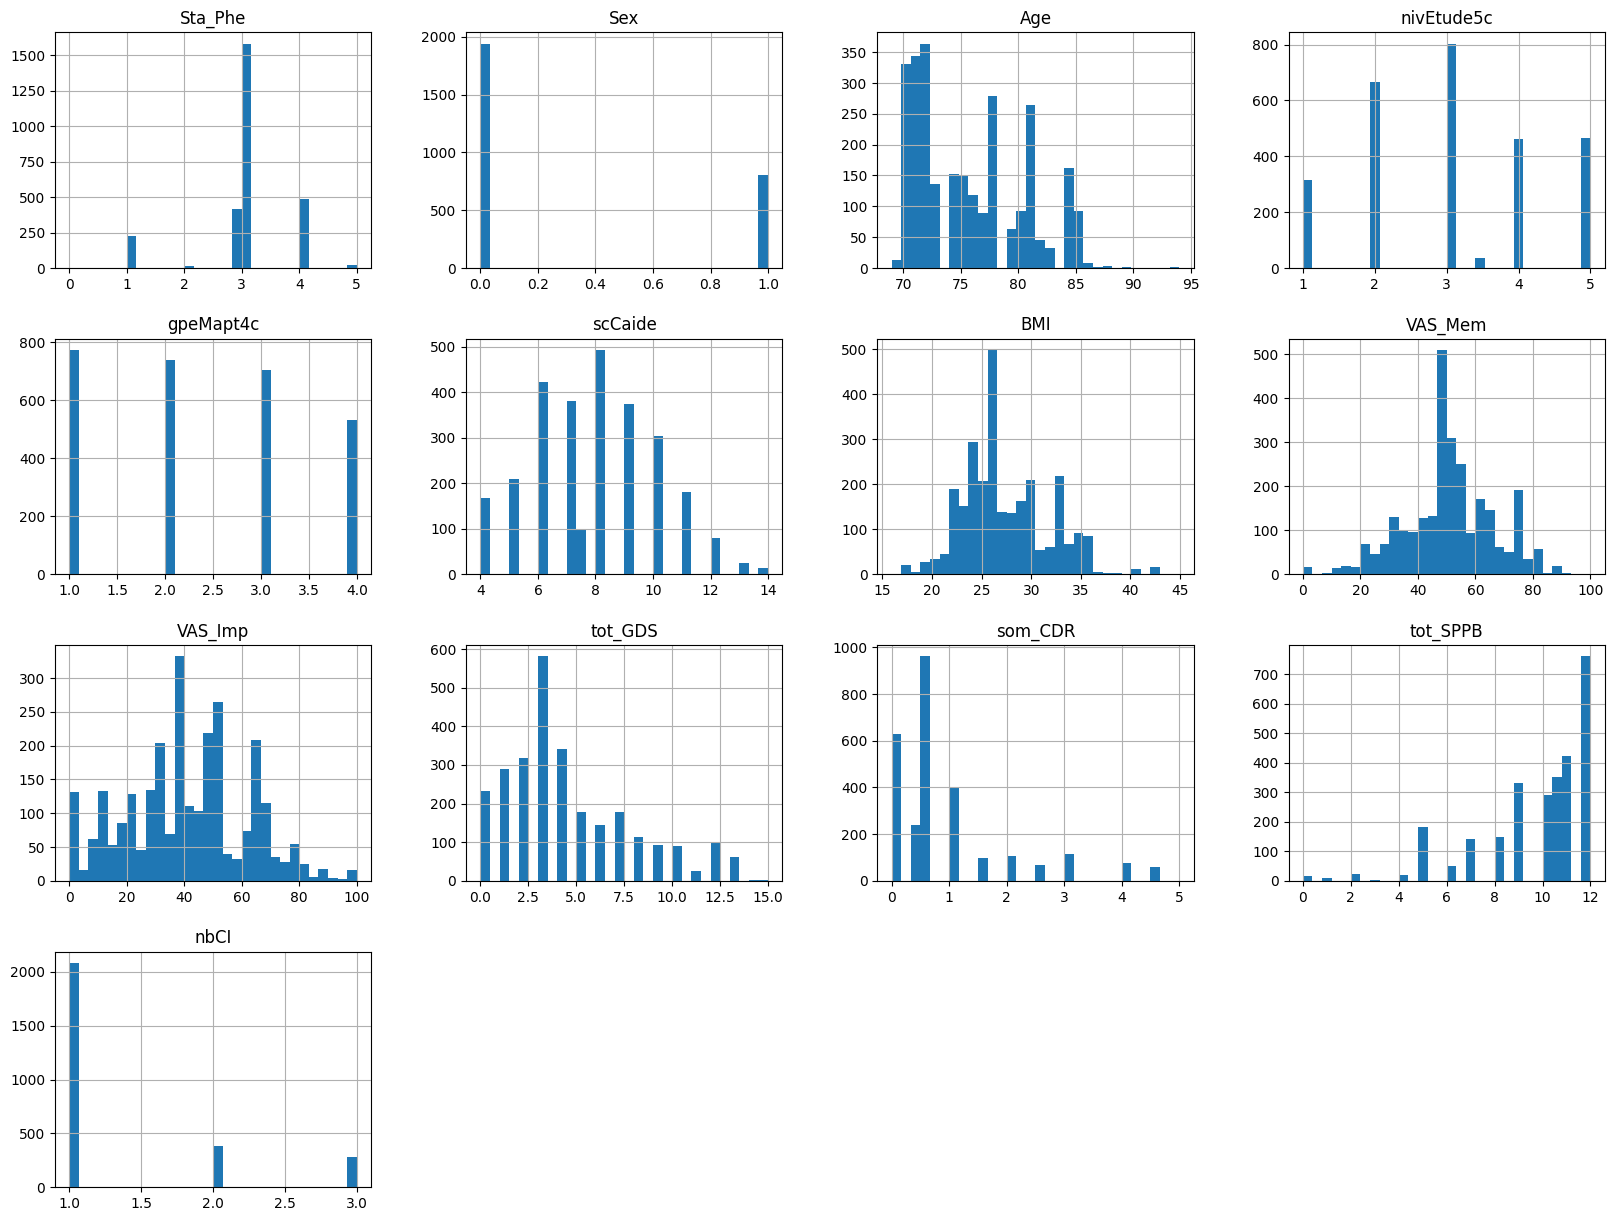

In [ ]:
X_train.hist(bins=30, figsize=(20,15))
plt.show()

# **Support vector Machines **

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train_scaled, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test_scaled)
classificaiton_report = classification_report(y_test, predictions)
print('Classificaiton report of SVM is: ', '\n' , classificaiton_report)

Classificaiton report of SVM is:  
               precision    recall  f1-score   support

           0       0.28      0.30      0.29       220
           1       0.34      0.37      0.35       241
           2       0.34      0.28      0.31       227

    accuracy                           0.32       688
   macro avg       0.32      0.32      0.32       688
weighted avg       0.32      0.32      0.32       688



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(clf, param_grid, cv=5)  # cv=5 specifies 5-fold cross-validation

# Fit the data to perform the grid search
grid_search_svm.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_svm.best_params_)

# Get the best model with the best hyperparameters
best_model = grid_search_svm.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.32      0.30       220
           1       0.34      0.39      0.36       241
           2       0.36      0.26      0.30       227

    accuracy                           0.32       688
   macro avg       0.33      0.32      0.32       688
weighted avg       0.33      0.32      0.32       688

Confusion Matrix:
[[ 70 103  47]
 [ 88  94  59]
 [ 90  78  59]]


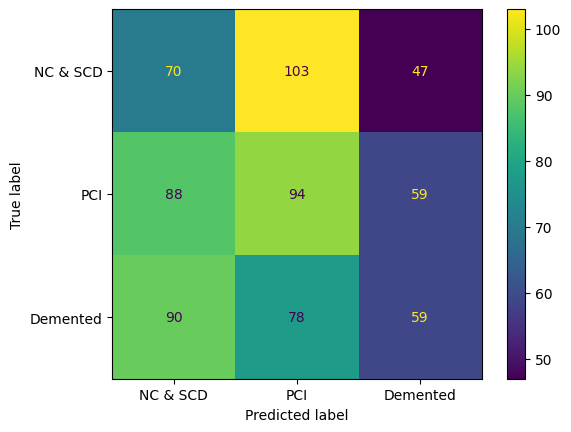

In [ ]:
# Get the best model with the best hyperparameters
best_model = grid_search_svm.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NC & SCD','PCI', 'Demented'])
disp.plot()
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_scaled, y_train)
predictions = rf_classifier.predict(X_test_scaled)
classificaiton_report = classification_report(y_test, predictions)
print('Classificaiton report of Random Forest is: ', '\n' , classificaiton_report)

Classificaiton report of Random Forest is:  
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       210
           1       1.00      0.83      0.90       241
           2       1.00      0.94      0.97       237

    accuracy                           0.92       688
   macro avg       0.93      0.92      0.92       688
weighted avg       0.93      0.92      0.92       688



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid, cv=5)  # cv=5 specifies 5-fold cross-validation

# Fit the data to perform the grid search
grid_search_rf.fit(X_train_scaled, y_train)  # Replace X and y with your feature and target data

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_rf.best_params_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       210
           1       1.00      0.78      0.87       241
           2       1.00      0.88      0.94       237

    accuracy                           0.88       688
   macro avg       0.91      0.89      0.88       688
weighted avg       0.91      0.88      0.88       688

Confusion Matrix:
[[210   0   0]
 [ 54 187   0]
 [ 28   0 209]]


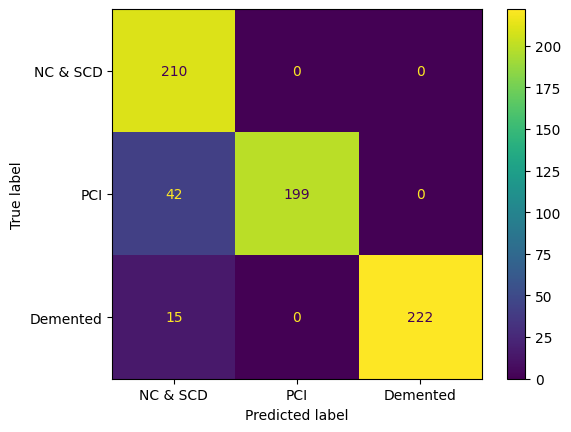

In [ ]:
y_pred = grid_search_rf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NC & SCD','PCI', 'Demented'])
disp.plot()
plt.show()

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
predictions = nb_classifier.predict(X_test_scaled)
classificaiton_report = classification_report(y_test, predictions)
print('Classificaiton report of NB is: ', '\n' , classificaiton_report)

Classificaiton report of NB is:  
               precision    recall  f1-score   support

           0       0.51      0.85      0.64       210
           1       0.51      0.29      0.37       241
           2       0.75      0.65      0.70       237

    accuracy                           0.58       688
   macro avg       0.59      0.60      0.57       688
weighted avg       0.59      0.58      0.56       688



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example parameter to tune
}

# Create the GridSearchCV object
grid_search_gnb = GridSearchCV(nb, param_grid, cv=5)  # cv=5 specifies 5-fold cross-validation

# Fit the data to perform the grid search
grid_search_gnb.fit(X_train_scaled, y_train)  # Replace X and y with your feature and target data

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_gnb.best_params_)

# Print the best accuracy score found
print("Best accuracy score:", grid_search_gnb.best_score_)

Best hyperparameters: {'var_smoothing': 1e-09}
Best accuracy score: 0.5970909090909091


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.85      0.64       210
           1       0.51      0.29      0.37       241
           2       0.75      0.65      0.70       237

    accuracy                           0.58       688
   macro avg       0.59      0.60      0.57       688
weighted avg       0.59      0.58      0.56       688

Confusion Matrix:
[[179  23   8]
 [128  69  44]
 [ 41  42 154]]


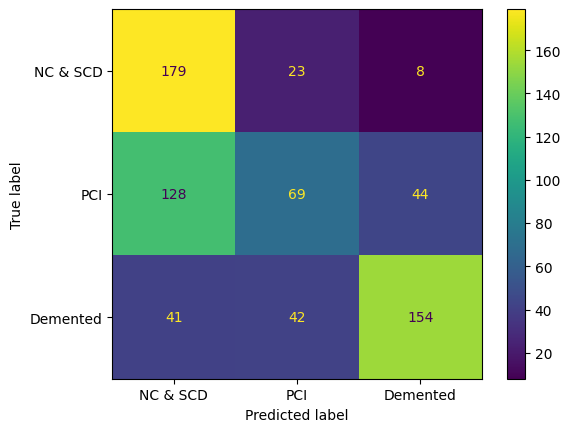

In [ ]:
y_pred = grid_search_gnb.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NC & SCD','PCI', 'Demented'])
disp.plot()
plt.show()

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       210
           1       0.86      0.69      0.77       241
           2       1.00      0.88      0.94       237

    accuracy                           0.83       688
   macro avg       0.85      0.83      0.83       688
weighted avg       0.85      0.83      0.83       688



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to perform
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate (shrinkage)
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

# Create the GridSearchCV object
grid_search_gbc = GridSearchCV(gb_classifier, param_grid, cv=5)  # cv=5 specifies 5-fold cross-validation

# Fit the data to perform the grid search
grid_search_gbc.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_gbc.best_params_)

# Get the best model with the best hyperparameters
best_model = grid_search_gbc.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       210
           1       1.00      0.86      0.93       241
           2       1.00      0.88      0.94       237

    accuracy                           0.91       688
   macro avg       0.92      0.91      0.91       688
weighted avg       0.93      0.91      0.91       688



Confusion Matrix:
[[210   0   0]
 [ 33 208   0]
 [ 28   0 209]]


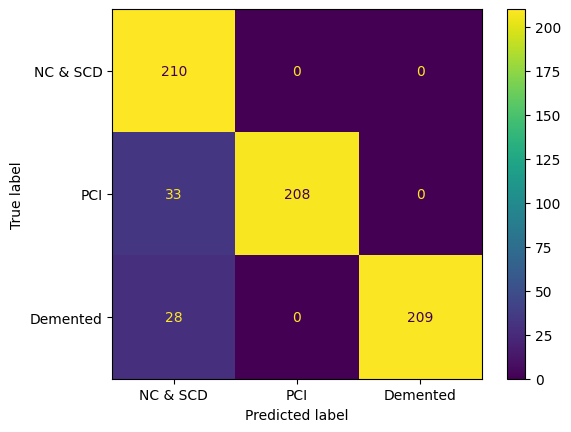

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NC & SCD','PCI', 'Demented'])
disp.plot()
plt.show()

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the AdaBoost Classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier on the training data
ada_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = ada_classifier.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.90      0.61       210
           1       0.75      0.23      0.35       241
           2       0.98      0.87      0.92       237

    accuracy                           0.65       688
   macro avg       0.73      0.66      0.63       688
weighted avg       0.74      0.65      0.63       688



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate
    }

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(ada_classifier, param_grid, cv=5)  # cv=5 specifies 5-fold cross-validation

# Fit the data to perform the grid search
grid_search_ada.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_ada.best_params_)

# Get the best model with the best hyperparameters
best_model = grid_search_ada.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.89      0.65       210
           1       0.64      0.36      0.46       241
           2       0.94      0.76      0.84       237

    accuracy                           0.66       688
   macro avg       0.70      0.67      0.65       688
weighted avg       0.71      0.66      0.65       688



Confusion Matrix:
[[187  20   3]
 [147  86   8]
 [ 29  28 180]]


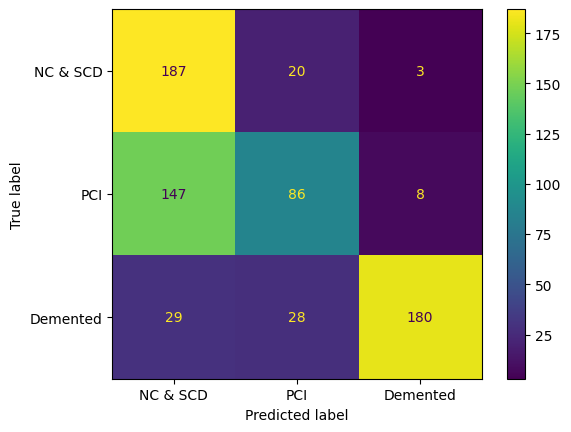

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NC & SCD','PCI', 'Demented'])
disp.plot()
plt.show()

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Create the kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors

# Train the classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       210
           1       0.91      1.00      0.95       241
           2       0.96      1.00      0.98       237

    accuracy                           0.95       688
   macro avg       0.96      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute nearest neighbors
}

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5)  # cv=5 specifies 5-fold cross-validation

# Fit the data to perform the grid search
grid_search_knn.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_knn.best_params_)

# Get the best model with the best hyperparameters
best_model = grid_search_knn.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       210
           1       0.92      1.00      0.96       241
           2       0.98      1.00      0.99       237

    accuracy                           0.97       688
   macro avg       0.97      0.96      0.96       688
weighted avg       0.97      0.97      0.96       688



Confusion Matrix:
[[186  20   4]
 [  0 241   0]
 [  0   0 237]]


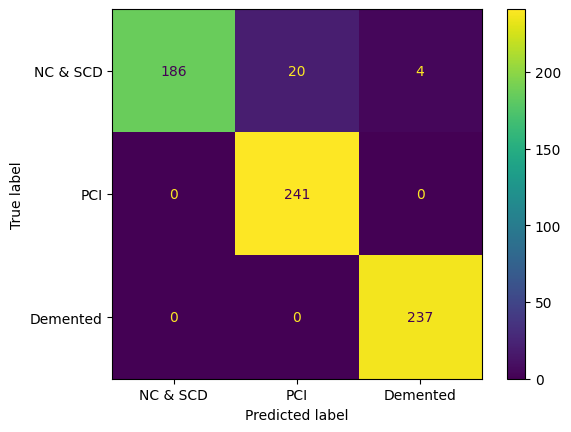

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NC & SCD','PCI', 'Demented'])
disp.plot()
plt.show()